## Deaths from Heart Disease 2008-2017

#### _Data Source:_
_Centers for Disease Control and Prevention, National Center for Health Statistics.  
Underlying Cause of Death 1999-2017 on CDC WONDER Online Database, released December, 2018._  

Data are from the Multiple Cause of Death Files, 1999-2017, as compiled from data provided by the 57 vital statistics jurisdictions through the Vital Statistics Cooperative Program. Accessed at http://wonder.cdc.gov/ucd-icd10.html.

See also http://wonder.cdc.gov/wonder/help/ucd.html for more information.

__Data selected for years:__ 2008 - 2017  
__Group By:__ County, Year, Gender, Ten-Year Age Groups, Cause of death

__ICD-10 codes chosen for data retrieval:__  
I01.0 Acute rheumatic pericarditis  
I01.1 Acute rheumatic endocarditis  
I01.2 Acute rheumatic myocarditis  
I01.8 Other acute rheumatic heart disease  
I01.9 Acute rheumatic heart disease, unspecified  
I11.0 Hypertensive heart disease with (congestive) heart failure  
I11.9 Hypertensive heart disease without (congestive) heart failure  
I13.0 Hypertensive heart and renal disease with (congestive) heart failure  
I13.1 Hypertensive heart and renal disease with renal failure  
I13.2 Hypertensive heart and renal disease with both (congestive) heart failure and renal failure   
I13.9 Hypertensive heart and renal disease, unspecified  
I20-I25 Ischaemic heart diseases  
I26-I28 Pulmonary heart disease and diseases of pulmonary circulation  
I30-I51 Other forms of heart disease  

The heart disease codes above were chosen as suggested by: [NCHS ICD-10 Rankable Causes (Leading Causes)](https://www.ehdp.com/epigram/nchs-icd-10-lcd.htm)

__Data processing post extraction:__ The _CDC Wonder_ tool only allows for the processing of 75,000 data rows at a time. The data was extracted by years and in segments of states to meet this limitation.  The result is 43 data tables. The data is parsed into a single csv file.

## _Table of Contents_

 - [import libraries](#import)  
 - [load data](#load)  
 - [analyze data](#analyze)
 - [basic plots](#basicplots)  
 - [examine cause](#examinecause)  
 - [create a new dataframe grouping on 'Cause of death'](#newdf)  
 - [basic seaborn plots](#basicsea)  
 - [assign a major grouping for type of heart disease](#majorheartgroup)  
 - [plots for major heart disease group](#plotsheartgroup)  
 - [how data was aquired](#howdata)  
 - [processing the data extracted from Wonder](#processdata)

<a id="import"></a>  
### _import the necessary libraries_

In [1]:
import matplotlib.pyplot as plt  
%matplotlib inline   
# include the line above so that you do not have to call plt.show() every time that you want to make a plot  
import pandas as pd
import seaborn as sns 

### _suppress the warning messages from seaborn_

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# set a default seaborn theme and reset 
sns.set()

<a id="load"></a>
### _load data_

In [4]:
# cod = cause of death
cod_df = pd.read_csv("data/heart_disease/data/heart_disease_all.csv")

<a id="analyze"></a>
### _analyze the data_

In [5]:
cod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104684 entries, 0 to 104683
Data columns (total 14 columns):
County                      104684 non-null object
State                       104684 non-null object
County Code                 104684 non-null int64
Year                        104684 non-null int64
Year Code                   104684 non-null int64
Gender                      104684 non-null object
Gender Code                 104684 non-null object
Ten-Year Age Groups         104684 non-null object
Ten-Year Age Groups Code    104684 non-null object
Cause of death              104684 non-null object
Cause of death Code         104684 non-null object
Deaths                      104684 non-null int64
Population                  104684 non-null int64
Crude Rate                  104684 non-null object
dtypes: int64(5), object(9)
memory usage: 11.2+ MB


In [6]:
cod_df.head()

,County,State,County Code,Year,Year Code,Gender,Gender Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Cause of death,Cause of death Code,Deaths,Population,Crude Rate
0,Baldwin,AL,1003,2008,2008,Female,F,75-84 years,75-84,Cardiac arrest - unspecified,I46.9,11,5013,Unreliable
1,Baldwin,AL,1003,2008,2008,Female,F,85+ years,85+,Atherosclerotic heart disease,I25.1,20,1912,1046.0
2,Baldwin,AL,1003,2008,2008,Female,F,85+ years,85+,Cardiac arrest - unspecified,I46.9,12,1912,Unreliable
3,Baldwin,AL,1003,2008,2008,Female,F,85+ years,85+,Congestive heart failure,I50.0,18,1912,Unreliable
4,Baldwin,AL,1003,2008,2008,Female,F,85+ years,85+,Heart disease - unspecified,I51.9,10,1912,Unreliable


In [7]:
sorted( cod_df['Cause of death'].unique() )

['Acute ischaemic heart disease - unspecified',
 'Acute myocardial infarction - unspecified',
 'Acute subendocardial myocardial infarction',
 'Aortic (valve) stenosis',
 'Aortic valve disorder - unspecified',
 'Atherosclerotic cardiovascular disease - so described',
 'Atherosclerotic heart disease',
 'Atrial fibrillation and flutter',
 'Cardiac arrest - unspecified',
 'Cardiac arrhythmia - unspecified',
 'Cardiomegaly',
 'Cardiomyopathy - unspecified',
 'Cardiovascular disease - unspecified',
 'Chronic ischaemic heart disease - unspecified',
 'Congestive heart failure',
 'Dilated cardiomyopathy',
 'Endocarditis - valve unspecified',
 'Heart disease - unspecified',
 'Heart failure - unspecified',
 'Hypertensive heart and renal disease with both (congestive) heart failure and renal failure',
 'Hypertensive heart and renal disease with renal failure',
 'Hypertensive heart disease with (congestive) heart failure',
 'Hypertensive heart disease without (congestive) heart failure',
 'Ischaemi

In [8]:
(cod_df.sort_values(by=["Deaths", "Cause of death"], ascending=[False, False])) .head()

,County,State,County Code,Year,Year Code,Gender,Gender Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Cause of death,Cause of death Code,Deaths,Population,Crude Rate
729,Los Angeles,CA,6037,2008,2008,Female,F,85+ years,85+,Atherosclerotic heart disease,I25.1,1646,92546,1778.6
38324,Los Angeles,CA,6037,2011,2011,Female,F,85+ years,85+,Atherosclerotic heart disease,I25.1,1619,104239,1553.2
21274,Los Angeles,CA,6037,2010,2010,Female,F,85+ years,85+,Atherosclerotic heart disease,I25.1,1599,98926,1616.4
18418,Los Angeles,CA,6037,2009,2009,Female,F,85+ years,85+,Atherosclerotic heart disease,I25.1,1568,96193,1630.1
59441,Los Angeles,CA,6037,2013,2013,Female,F,85+ years,85+,Atherosclerotic heart disease,I25.1,1544,110057,1402.9


In [9]:
sorted( cod_df['Ten-Year Age Groups'].unique() ) 

['25-34 years',
 '35-44 years',
 '45-54 years',
 '55-64 years',
 '65-74 years',
 '75-84 years',
 '85+ years']

### _group total number of deaths by year_

In [10]:
cod_df.groupby(by=['Year']).sum()['Deaths']

Year
2008    310996
2009    295274
2010    293253
2011    290122
2012    289872
2013    295111
2014    292840
2015    301690
2016    298375
2017    302707
Name: Deaths, dtype: int64

### _group total number of deaths by age groups_

In [11]:
cod_df.groupby(by=['Ten-Year Age Groups']).sum()['Deaths']

Ten-Year Age Groups
25-34 years        424
35-44 years       8869
45-54 years      94728
55-64 years     286468
65-74 years     409015
75-84 years     729117
85+ years      1441619
Name: Deaths, dtype: int64

### _group total number of deaths by Year and `'Cause of death'` (heart disease)_

In [12]:
cod_df.groupby(by=['Year','Cause of death']).sum()['Deaths'].head()

Year  Cause of death                                       
2008  Acute ischaemic heart disease - unspecified                 241
      Acute myocardial infarction - unspecified                 77518
      Aortic (valve) stenosis                                    3677
      Atherosclerotic cardiovascular disease - so described     36824
      Atherosclerotic heart disease                            135495
Name: Deaths, dtype: int64

<a id="basicplots"></a>
### _basic plots to check data_

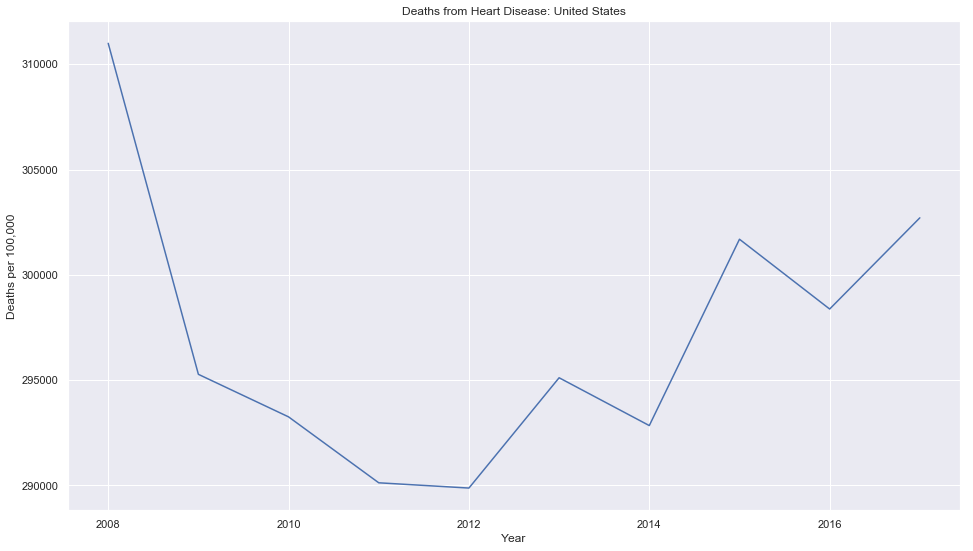

In [13]:
# Group total number of deaths by year
ax = cod_df.groupby(by=['Year']).sum()['Deaths'].plot(title='Deaths from Heart Disease: United States');

ax.set_ylabel("Deaths per 100,000")
fig = plt.gcf()
fig.set_size_inches(16,9)

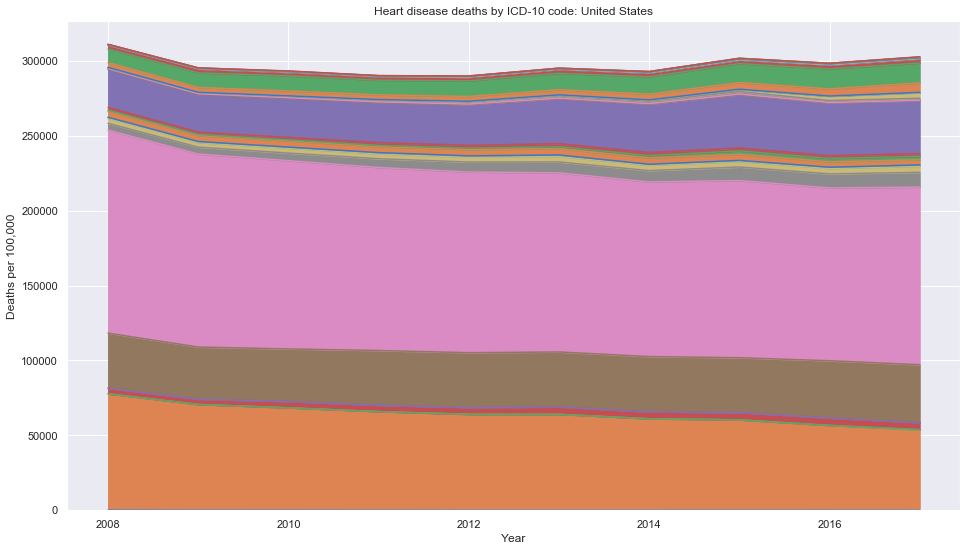

In [14]:
cod_df_groups = cod_df.groupby(by=['Year','Cause of death'],as_index=False).sum()
cod_df_pivot = cod_df_groups.pivot(index='Year',columns='Cause of death',values='Deaths')

ax = cod_df_pivot.plot.area(title='Heart disease deaths by ICD-10 code: United States')
ax.legend().set_visible(False)
ax.set_ylabel("Deaths per 100,000")
fig = plt.gcf()
fig.set_size_inches(16,9)

<a id="examinecause"></a>
### _examine `'Cause of death'` and group_

In [15]:
cod_df[['Deaths']].groupby(cod_df['Cause of death']).describe().head()

Deaths                        \
                                               count       mean        std   
Cause of death                                                               
Acute ischaemic heart disease - unspecified     70.0  14.857143   4.476301   
Acute myocardial infarction - unspecified    25367.0  25.289234  32.238295   
Acute subendocardial myocardial infarction      40.0  13.025000   3.886119   
Aortic (valve) stenosis                       2348.0  18.699319  12.465918   
Aortic valve disorder - unspecified              2.0  10.000000   0.000000   

                                                                            
                                              min   25%   50%   75%    max  
Cause of death                                                              
Acute ischaemic heart disease - unspecified  10.0  11.0  14.0  17.0   30.0  
Acute myocardial infarction - unspecified    10.0  12.0  16.0  26.0  805.0  
Acute subendocardial myocardial infarction   10.0  10.0  11.0  15.0   26.0  
Aortic (valve) stenosis                      10.0  11.0  15.0  21.0  138.0  
Aortic valve disorder - unspecified          10.0  10.0  10.0  10.0   10.0

In [16]:
cod_df[['Deaths']].groupby(cod_df['Cause of death']).count().head()

,Deaths
Cause of death,
Acute ischaemic heart disease - unspecified,70
Acute myocardial infarction - unspecified,25367
Acute subendocardial myocardial infarction,40
Aortic (valve) stenosis,2348
Aortic valve disorder - unspecified,2


<a id="newdf"></a>
### _create a new dataframe grouping on `'Cause of death'`_

In [17]:
#create a new dataframe
new_group_df = cod_df.groupby(['Year','Cause of death','Cause of death Code'], as_index=False).agg({'Deaths':'sum'}) # this creates a pandas dataframe with a normal index
new_group_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 293
Data columns (total 4 columns):
Year                   294 non-null int64
Cause of death         294 non-null object
Cause of death Code    294 non-null object
Deaths                 294 non-null int64
dtypes: int64(2), object(2)
memory usage: 11.5+ KB


<a id="basicsea"></a>
### _basic seaborn plots_

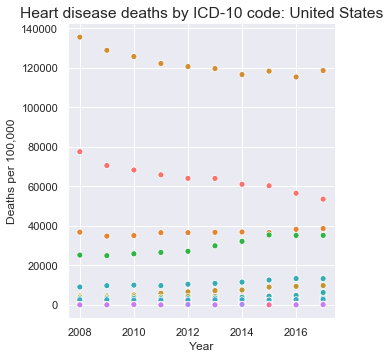

In [18]:
sns.relplot(y="Deaths", x="Year", hue="Cause of death", data=new_group_df, legend=False)
sns.set(font_scale=1.3)
plt.title('Heart disease deaths by ICD-10 code: United States')
plt.ylabel('Deaths per 100,000')
plt.xlabel('Year');

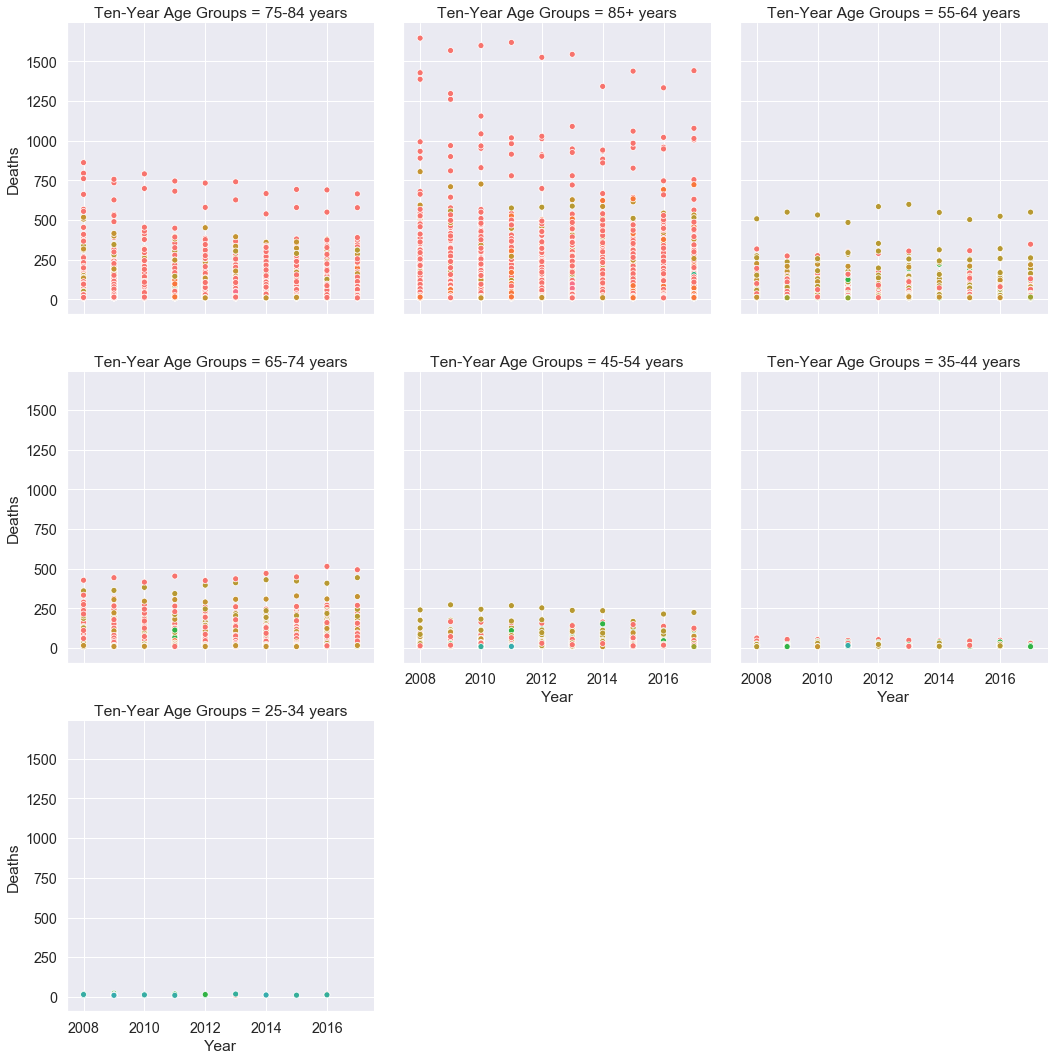

In [19]:
sns.relplot(y="Deaths", x="Year", hue="Cause of death", col='Ten-Year Age Groups', col_wrap=3, data=cod_df, legend=False);

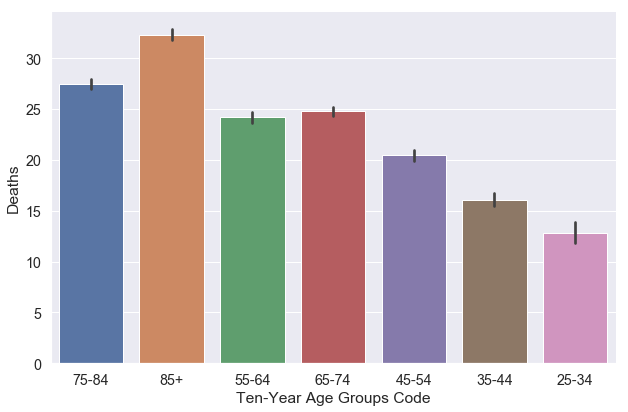

In [20]:
sns.catplot(x='Ten-Year Age Groups Code', y='Deaths', kind="bar", data=cod_df, height=6, aspect=1.5);

In [ ]:
#sns.swarmplot(x='Gender', y='Deaths',hue="Cause of death", data=cod_df)

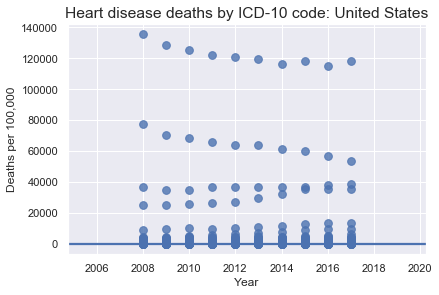

In [22]:
# Visualize logistic curve using seaborn
sns.set(style="darkgrid")
sns.regplot(x="Year", y="Deaths", data=new_group_df, logistic=True, n_boot=500, y_jitter=.01, scatter_kws={"s": 60})
sns.set(font_scale=1.3)
plt.title('Heart disease deaths by ICD-10 code: United States')
plt.ylabel('Deaths per 100,000')
plt.xlabel('Year')
plt.subplots_adjust(right=0.93, top=0.90, left=0.10, bottom=0.10);
#plt.show() 

<a id="majorheartgroup"></a>
### _assign a major grouping for type of heart disease_
doing this to limit the number of categories for cause of death

__major groupings for heart disease ICD-10__  
I01.0 (Acute rheumatic pericarditis)  
I01.1 (Acute rheumatic endocarditis)  
I01.2 (Acute rheumatic myocarditis)  
I01.8 (Other acute rheumatic heart disease)  
I01.9 (Acute rheumatic heart disease, unspecified)  
I11 (Hypertensive heart disease)    
I13 (Hypertensive heart and renal disease)    
I20-I25 (Ischaemic heart diseases)
I26-I28 (Pulmonary heart disease and diseases of pulmonary circulation)  
I30-I51 (Other forms of heart disease)  

In [23]:
#new_group_df['Cause of death ID']=
new_group_df['Cause of death ID']=new_group_df['Cause of death Code'].str[:3]

In [24]:
d = {'I01':'Acute rheumatic heart disease', 'I11':'Hypertensive heart disease', 'I13':'Hypertensive heart and renal disease', 'I20':'Ischaemic heart diseases',
     'I21':'Ischaemic heart diseases', 'I22':'Ischaemic heart diseases', 'I23':'Ischaemic heart diseases', 'I24':'Ischaemic heart diseases', 'I25':'Ischaemic heart diseases',
     'I26':'Pulmonary heart disease and diseases of pulmonary circulation', 'I27':'Pulmonary heart disease and diseases of pulmonary circulation',
     'I28':'Pulmonary heart disease and diseases of pulmonary circulation', 'I30':'Other forms of heart disease', 'I31':'Other forms of heart disease', 
     'I32':'Other forms of heart disease', 'I33':'Other forms of heart disease', 'I34':'Other forms of heart disease', 'I35':'Other forms of heart disease', 
     'I36':'Other forms of heart disease', 'I37':'Other forms of heart disease', 'I38':'Other forms of heart disease', 'I39':'Other forms of heart disease', 
     'I40':'Other forms of heart disease', 'I41':'Other forms of heart disease', 'I42':'Other forms of heart disease', 'I43':'Other forms of heart disease', 
     'I44':'Other forms of heart disease', 'I45':'Other forms of heart disease', 'I46':'Other forms of heart disease', 'I47':'Other forms of heart disease', 
     'I48':'Other forms of heart disease', 'I49':'Other forms of heart disease', 'I50':'Other forms of heart disease', 'I51':'Other forms of heart disease'}
new_group_df['Type of Heart Disease'] = new_group_df['Cause of death ID'].map(d)
new_group_df.head()

,Year,Cause of death,Cause of death Code,Deaths,Cause of death ID,Type of Heart Disease
0,2008,Acute ischaemic heart disease - unspecified,I24.9,241,I24,Ischaemic heart diseases
1,2008,Acute myocardial infarction - unspecified,I21.9,77518,I21,Ischaemic heart diseases
2,2008,Aortic (valve) stenosis,I35.0,3677,I35,Other forms of heart disease
3,2008,Atherosclerotic cardiovascular disease - so de...,I25.0,36824,I25,Ischaemic heart diseases
4,2008,Atherosclerotic heart disease,I25.1,135495,I25,Ischaemic heart diseases


<a id="plotsheartgroup"></a>
### _plots for major heart disease group_

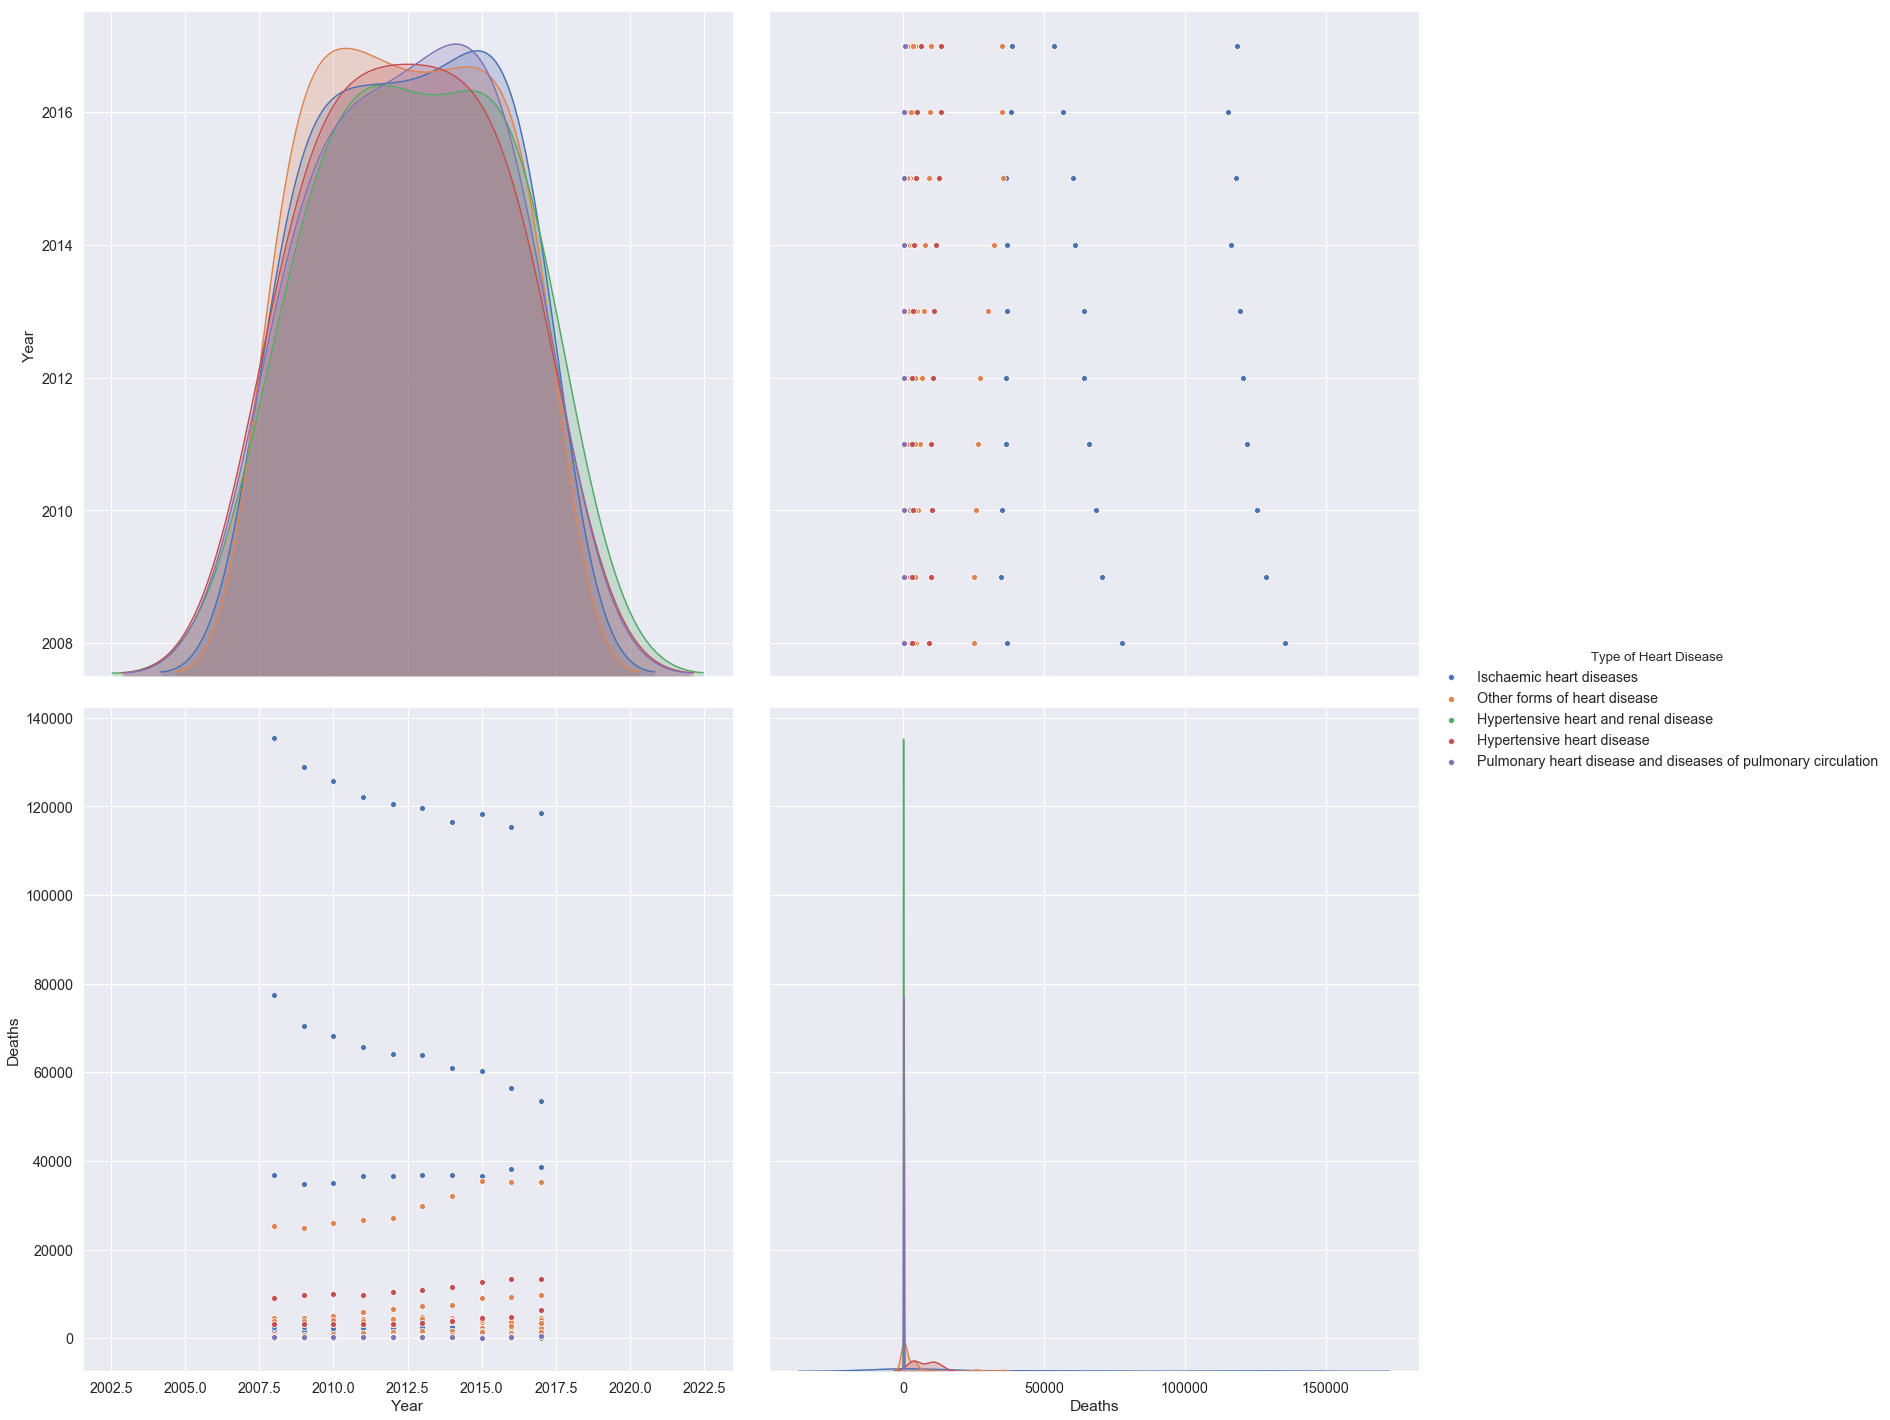

In [25]:
sns.pairplot(new_group_df, hue='Type of Heart Disease', height=10, aspect=1.0);

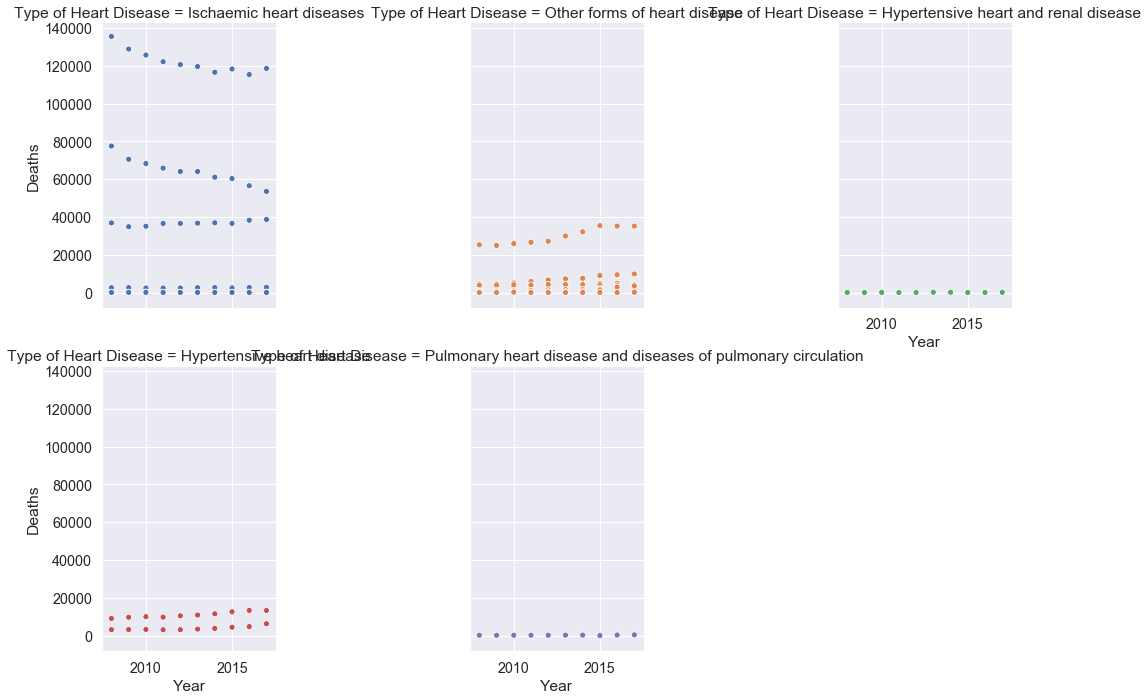

In [26]:
sns.relplot(y='Deaths', x='Year', hue='Type of Heart Disease', col='Type of Heart Disease', col_wrap=3, data=new_group_df, legend=False);

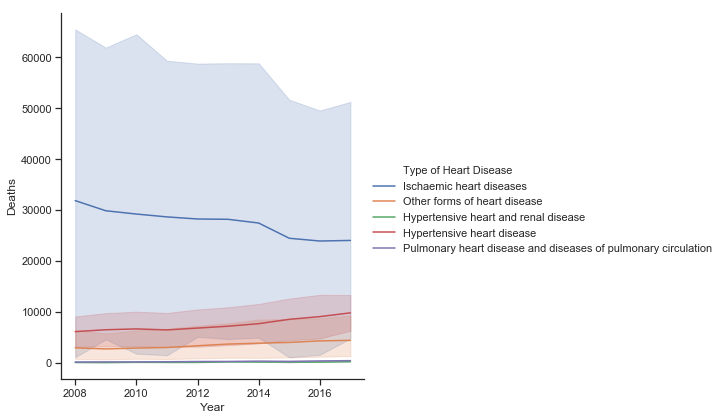

In [27]:
sns.set(style="ticks")
palette = dict(zip(new_group_df['Type of Heart Disease'].unique(),
                   sns.color_palette("rocket_r",5)))

# Plot the lines on two facets
sns.relplot(x="Year", y="Deaths",
            hue="Type of Heart Disease",
            size_order=["T1", "T2"],
            height=6, aspect=1.0, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=new_group_df);

In [28]:
new_group_df['Type of Heart Disease'].unique()

array(['Ischaemic heart diseases', 'Other forms of heart disease',
       'Hypertensive heart and renal disease',
       'Hypertensive heart disease',
       'Pulmonary heart disease and diseases of pulmonary circulation'],
      dtype=object)

In [29]:
new_group_df.head()

,Year,Cause of death,Cause of death Code,Deaths,Cause of death ID,Type of Heart Disease
0,2008,Acute ischaemic heart disease - unspecified,I24.9,241,I24,Ischaemic heart diseases
1,2008,Acute myocardial infarction - unspecified,I21.9,77518,I21,Ischaemic heart diseases
2,2008,Aortic (valve) stenosis,I35.0,3677,I35,Other forms of heart disease
3,2008,Atherosclerotic cardiovascular disease - so de...,I25.0,36824,I25,Ischaemic heart diseases
4,2008,Atherosclerotic heart disease,I25.1,135495,I25,Ischaemic heart diseases


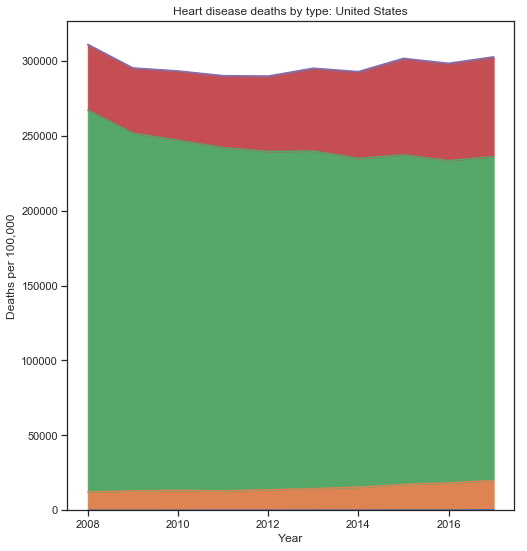

In [30]:
new_group_group = new_group_df.groupby(by=['Year','Type of Heart Disease'],as_index=False).sum()
new_group_df_pivot = new_group_group.pivot(index='Year',columns='Type of Heart Disease',values='Deaths')

ax = new_group_df_pivot.plot.area(title='Heart disease deaths by type: United States')
ax.legend().set_visible(False)
ax.set_ylabel("Deaths per 100,000")
fig = plt.gcf()
fig.set_size_inches(8,9)

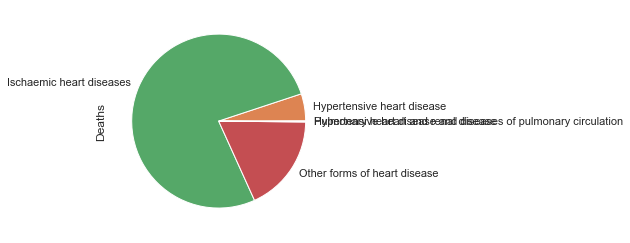

In [31]:
# Pie
g = new_group_df.groupby('Type of Heart Disease')[['Deaths']].sum().plot.pie(subplots=True,
                   legend=False)

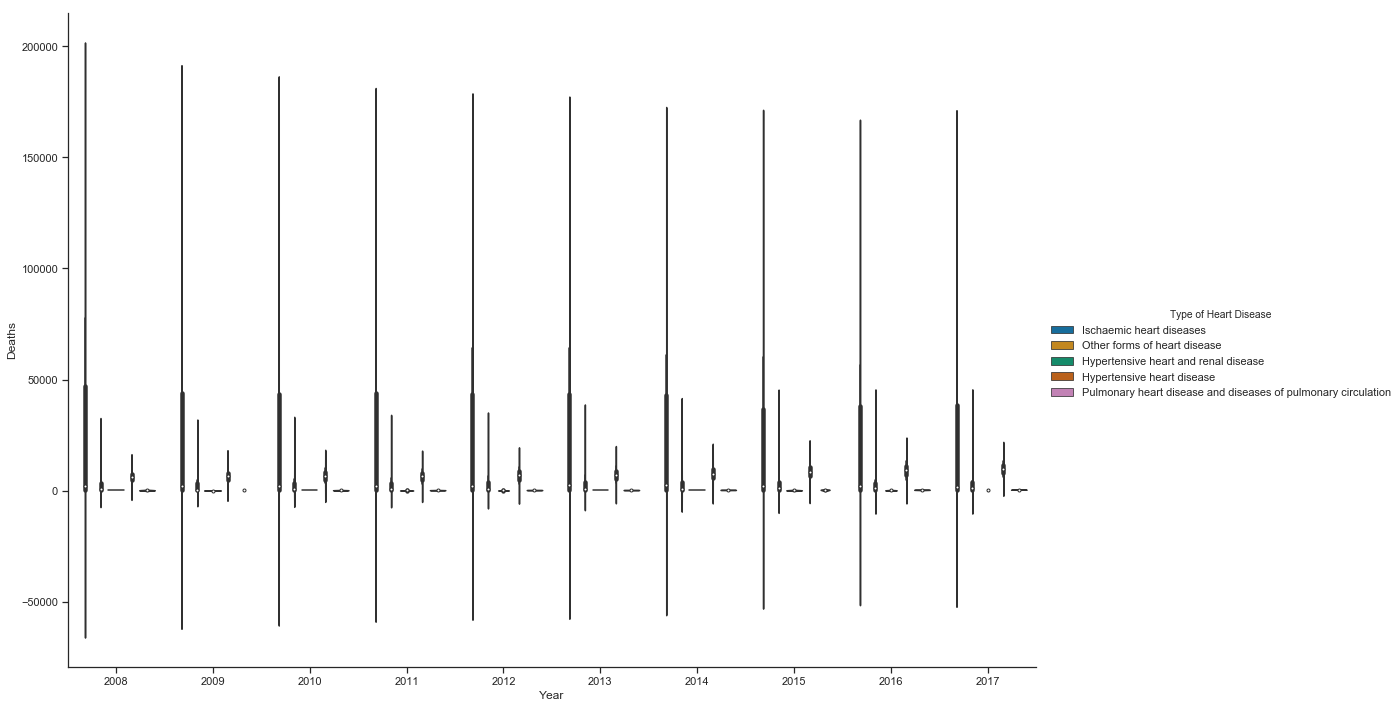

In [32]:
# Violin plot
plt.style.use('ggplot')
sns.set(style="ticks")


viol_plot = sns.factorplot(x="Year", 
                       y="Deaths", 
                       hue="Type of Heart Disease", 
                       data=new_group_df, 
                       palette="colorblind",
                       kind='violin',
                       size = 10,
                       aspect = 1.5,
                       legend_out=True)



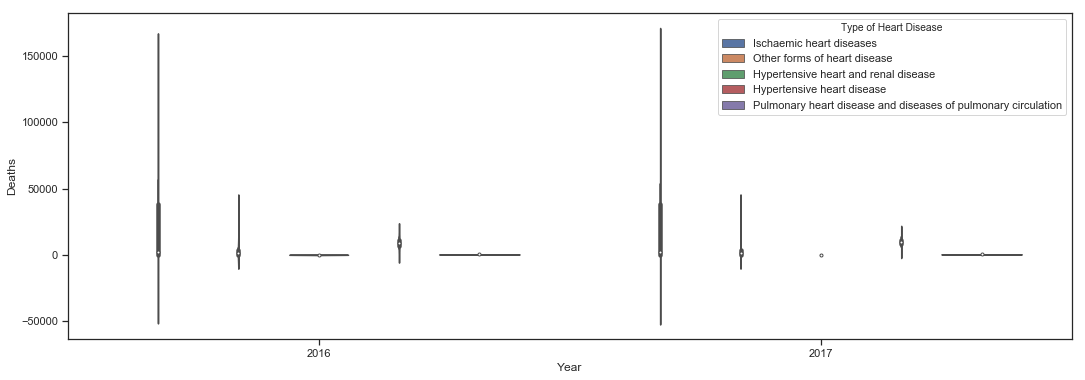

In [33]:
fig = plt.figure(figsize=(18,6))
filtered_years = new_group_df[new_group_df['Year'] > 2015]
ax1 = sns.violinplot('Year', "Deaths", data=filtered_years, hue='Type of Heart Disease')

<a id="howdata"></a>
### _how data was aquired_

As identified in the sources section at top, the data was aquired using the CDC WONDER Online Database. Screen shots below show the setup.

<div style="width: 800px;">[ScreenShot1.png](images/ScreenShot1.png)</div>
<img src="images/ScreenShot1.png" width="800">
<div style="width: 800px;">[ScreenShot2.png](images/ScreenShot2.png)</div>
<img src="data/heart_disease/images/ScreenShot2.png" width="800">
<div style="width: 800px;">[ScreenShot3.png](images/ScreenShot3.png)</div>
<img src="data/heart_disease/images/ScreenShot3.png" width="800">

<a id="processdata"></a>
### _processing the data extracted from Wonder_

file_parser.py

In [34]:
file_prefix = "data/heart_disease/data-raw/heart_disease2 ("
file_suffix = ").txt"
for file_num in range(42):
    if (file_num == 2) or (file_num == 17):  # skip duplicate sets that were double downloaded
        continue
    file_name = file_prefix + str(file_num) + file_suffix
    fileObj = open(file_name,'r')
    if file_num == 0:
        fileOutObj = open("data/heart_disease/data/heart_disease_all.csv","w")
        header = 'County,State,County Code,Year,Year Code,Gender,Gender Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Cause of death,Cause of death Code,Deaths,Population,Crude Rate\n'
        fileOutObj.write(header)
    cntr = 0
    for line in fileObj:
        outStr = ""
        if line[1:5] != 'Note':
            if line[1:4] == '---':
                break
            line = line.replace('"', '').strip()    # remove all the quotes
            line = line.replace(' County, ', ',').strip() # remove County
            # lines below remove the odd places where a comma appears in the cause of death field
            line = line.replace(', valve', ' - valve').strip()
            line = line.replace(', un', ' - un').strip()
            line = line.replace(', so', ' - so').strip()
            line = line.replace(', ', ',').strip()  # replace all comma space with comma
            line = line.replace('\t', ',').strip()  # replace all tabs with comma
            # AK,DC,LA,MD,WV,VA are states that have some or no 'County' designation
            outStr =line+'\n'
            fileOutObj.write(outStr)
            cntr += 1
    print(cntr, 'records parsed in dataset: ' + file_name)
fileOutObj.close()
fileObj.close()


2918 records parsed in dataset: data/heart_disease/data-raw/heart_disease2 (0).txt
2495 records parsed in dataset: data/heart_disease/data-raw/heart_disease2 (1).txt
3367 records parsed in dataset: data/heart_disease/data-raw/heart_disease2 (3).txt
1661 records parsed in dataset: data/heart_disease/data-raw/heart_disease2 (4).txt
1574 records parsed in dataset: data/heart_disease/data-raw/heart_disease2 (5).txt
3299 records parsed in dataset: data/heart_disease/data-raw/heart_disease2 (6).txt
2412 records parsed in dataset: data/heart_disease/data-raw/heart_disease2 (7).txt
2848 records parsed in dataset: data/heart_disease/data-raw/heart_disease2 (8).txt
2925 records parsed in dataset: data/heart_disease/data-raw/heart_disease2 (9).txt
3030 records parsed in dataset: data/heart_disease/data-raw/heart_disease2 (10).txt
2934 records parsed in dataset: data/heart_disease/data-raw/heart_disease2 (11).txt
1350 records parsed in dataset: data/heart_disease/data-raw/heart_disease2 (12).txt
1